In [ ]:
import os
os.chdir("/Users/mphomafata/Documents/GitHub/Chromatographic-data")
import pandas as pd
from scipy.io import netcdf_file
beer_files = sorted(os.listdir("/Users/mphomafata/Documents/Work_file/Collaborative Work/Cody/Untargeted - Gin and Beer/raw_data/Beer/"))
beer_data = []
for beer_file in beer_files[:3]:
    cdf_file = netcdf_file(f'/Users/mphomafata/Documents/Work_file/Collaborative Work/Cody/Untargeted - Gin and Beer/raw_data/Beer/{beer_file}', mmap=False)
    data = pd.DataFrame(columns=["retention_time","mass_values", "intensities"])
    # variables of interest
    mass_values = cdf_file.variables['mass_values'].data
    retention_time = cdf_file.variables['scan_acquisition_time'].data
    point_count = cdf_file.variables['point_count'].data
    
    # cumulative counter 
    def Cumulative(lists): 
        cu_list = [] 
        length = len(lists) 
        cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)] 
        return cu_list[1:]
    lists = point_count
    point_counter = Cumulative(lists)
    
    for i, s in enumerate(retention_time):
        if i==0:
            start = i
        else:
            start = point_counter[i-1]+1
        stop = point_counter[i]
        rt = cdf_file.variables['scan_acquisition_time'][i]
        # print("retention time " + str(rt)+ " has " + str(point_count[i]) + " points starting at " + str(start) + " ending at " + str(stop))
        intensities = cdf_file.variables['intensity_values'][start:stop]
        mass_values = cdf_file.variables['mass_values'][start:stop]
        data.loc[len(data.index)] = [rt,mass_values, intensities]
    data = data.explode(['mass_values','intensities']).reset_index(drop=True)
    # data = data.explode('intensities')
    beer_data.append(data)
    # data.to_excel(f"{beer_file}.xlsx") # too large  to print to excel
    print("Finished sample " + str(beer_files.index(f"{beer_file}") +1) + " of " + str(len(beer_files)))
    # print(f"Sample {beer_file} completed!")
cdf_file .close()


In [ ]:
beer_data[0]

# Plot the 2D and 3D spectrum for the first sample


# 1D plot of tic and mass spec

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_data = pd.DataFrame(beer_data[0])
print(my_data)

# Creating figure
fig = plt.figure(figsize = (12, 10))
 
for i in range(0,2):
    ax1 = fig.add_subplot(2,1,1)
    data1 = my_data.groupby(['retention_time']).aggregate({'intensities':'sum'}).reset_index(drop=False)
    x1 = data1["retention_time"].astype("float")/60
    y1 = data1["intensities"].astype("float")
    # ax1 = plt.subplot(2,1,1)    
    ax1 = sns.lineplot(data=data1, x=x1, y=y1, c='green', alpha = 0.9)
    
    ax2 = fig.add_subplot(2,1,2)
    data2 = my_data.groupby('mass_values').aggregate(intensities=('intensities','sum')).reset_index(drop=False)
    x2 = data2["mass_values"]
    y2 = data2["intensities"]
    # ax2 = plt.subplot(2,1,1)    
    ax2 = sns.lineplot(data = data2,x=x2, y=y2, c='green', alpha = 0.9)
    
    # plt.xlabel('Retention time (minutes)', fontweight ='bold') 
    # plt.ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 


plt.savefig(fname = "overlay_plot.jpg",dpi = 600,
                        transparent=True, format = "jpg")

# 2D Plot

In [ ]:
import matplotlib.pyplot as plt



my_data = beer_data


# Creating figure
fig= plt.figure(figsize = (12, 10))
 
# Creating plot
for i in range(len(my_data)):
    
    data = my_data[i]
    x = data["retention_time"]/60
    y = data["mass_values"]
    z = data["intensities"]

    plt.scatter(x, y, 
                 c = 'green', 
                 marker = "x", s= 2, alpha = 0.01)
    plt.scatter(x, y,
                c = 'red', 
                 marker = "x", s= 2, alpha = z/(max(z)))
    plt.xlabel('Retention time (minutes)', fontweight ='bold') 
    plt.ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 

# plt.savefig(fname = "2d_plot.jpg",dpi = 600,
#                         transparent=True, format = "jpg")

# 3D Plot

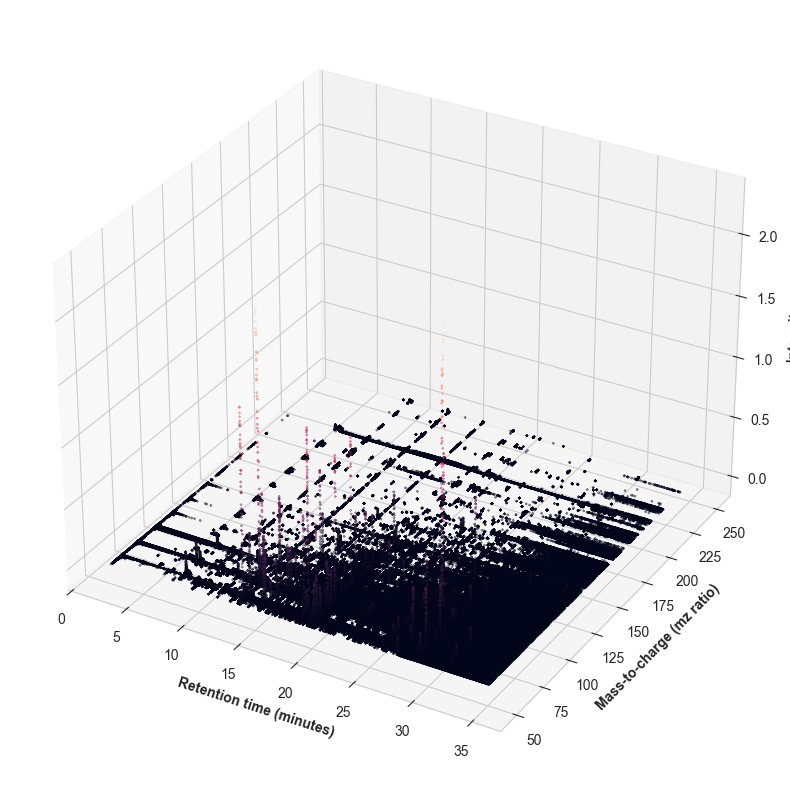

In [24]:
import matplotlib.pyplot as plt
data = beer_data[0]

# Creating figure
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(xs=data["retention_time"]/60,
           ys = data["mass_values"], 
           zs = data["intensities"], 
           c = data["intensities"],
           marker = "x", s= 1, alpha = 0.5)

ax.set_xlabel('Retention time (minutes)', fontweight ='bold') 
ax.set_ylabel('Mass-to-charge (mz ratio)', fontweight ='bold') 
ax.set_zlabel('Intensity', fontweight ='bold')
plt.savefig(fname = "3d_plot.jpg",dpi = 300,
                        transparent=True, format = "jpg")

# Peak detection

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
x1 = pd.DataFrame(beer_data[0])
x1=x1.groupby(["retention_time"]).aggregate({'intensities':'sum'}).reset_index()
x1=x1["intensities"].reset_index(drop=True)
# x=x.iloc[1500:2500].reset_index(drop=True)
peaks1, _ = find_peaks(x1, width=1)

x2 = pd.DataFrame(beer_data[0])
x2=x2.groupby(["mass_values"]).aggregate({'intensities':'sum'}).reset_index()
x2=x2["intensities"].reset_index(drop=True)
# x=x.iloc[1500:2500].reset_index(drop=True)
peaks2, _ = find_peaks(x2)


fig = plt.figure(figsize = (15, 12))
ax1 = fig.add_subplot(2,1,1)
ax1 = plt.plot(x1,'black')
ax1 = plt.plot(peaks1, x1[peaks1], "x",color = 'red') 

ax2 = fig.add_subplot(2,1,2)
ax2 = plt.plot(x2,'black')
ax2 = plt.plot(peaks2, x2[peaks2], "x",color = 'red') 

# beer_data[0]